In [28]:
import pandas as pd
import numpy as np

In [29]:
heart_data = pd.read_csv('heart_data_clean.csv')

Because the outcome variable (target) is binary, I'm going to use a logistic regression.

First, I will split the data into two sets: the target variable and the predictors/features

In [30]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 
           'restecg', 'thalach', 'exang', 'oldpeak', 
           'slope', 'ca', 'thal']

X = heart_data[features]
y = heart_data['target']

The next step is to split the data into training and testing datasets

Logistic regression will use scikit learn:

> train_test_split

> LogisticRegression

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
#using train test split to train; 
#test size = 1/4 of the data will be used to test (3/4 for training)
#random_state = select test data randomly
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
reg = LogisticRegression()

#fit the model with training data
reg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
#predict y (target) using test data
y_predict = reg.predict(X_test)

Now I need to evaluate the model.

To do this, I'll use a confusion matrix to compare the predictions (y_predict) to the test data (y_test)

In [36]:
from sklearn import metrics

In [37]:
conf_matrix = metrics.confusion_matrix(y_test, y_predict)
conf_matrix

array([[28,  3],
       [ 4, 23]])

28 and 23 are accurate predictions (0, 1)
3 and 4 are inaccurate predictions (0, 1)

Seems pretty accurate, but let's visualize this matrix.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted')

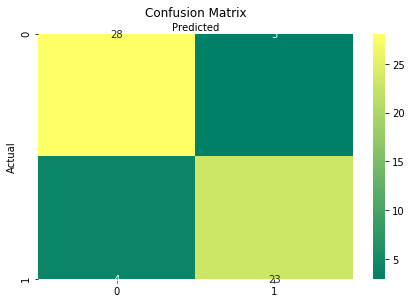

In [39]:
#Using a heatmap to visualize the confusion matrix

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_matrix),
           annot = True, cmap = 'summer')

ax.xaxis.set_label_position('top')

plt.tight_layout()

plt.title("Confusion Matrix", y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

To better evaluate the model, I'm going to use accuracy, precision, and recall; 

In [40]:
print("accuracy: ", metrics.accuracy_score(y_test, y_predict))
print('precision: ', metrics.precision_score(y_test, y_predict))
print('recall: ', metrics.recall_score(y_test, y_predict))

accuracy:  0.8793103448275862
precision:  0.8846153846153846
recall:  0.8518518518518519


Accuracy is almost 88%, which is pretty good.

A precision rate of .88 means that when the model predicts that someone has heart disease, they have it 88% of the time.

Recall .85 = Those with heart diease in the data set are identified 85% of the time.

ROC curve to explore accuracy (true/false positives)

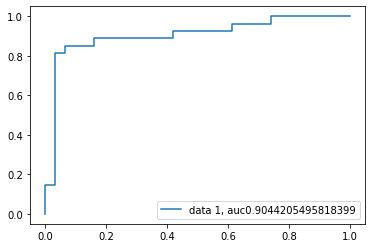

In [42]:
y_pred_prob = reg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)

auc = metrics.roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label = "data 1, auc"+str(auc))
plt.legend(loc=4)
plt.show()

auc is .90, so it's a good classifier (1 is perfect)

Conclusion: The accuracy of this model is pretty high with all the variables as features. However, some features didn't seem like they would be very predictive based on the exploratory data analysis, so I will run a logistic regression analysis to see the p-values/coefficients associated with each feature.

In [60]:
import statsmodels.formula.api as smf

In [79]:
model = smf.logit(
    formula="target ~ age + \
    sex + cp + trestbps + chol+ restecg + \
                  thalach + exang + oldpeak + \
                  slope + ca + thal", data = heart_data).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.318247
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  232
Model:                          Logit   Df Residuals:                      219
Method:                           MLE   Df Model:                           12
Date:                Sat, 14 Dec 2019   Pseudo R-squ.:                  0.5308
Time:                        16:10:44   Log-Likelihood:                -73.833
converged:                       True   LL-Null:                       -157.34
Covariance Type:            nonrobust   LLR p-value:                 1.939e-29
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.1162      3.429     -1.492      0.136     -11.838       1.605
age           -0.0182      0.028     -0.655      0.512      -0.073       0.036
sex            1.9479      0.564      3.451      0.001       0.842       3.054
cp            -0.8077      0.222     -3.639      0.000      -1.243      -0.373
trestbps       0.0271      0.014      1.926      0.054      -0.000       0.055
chol           0.0062      0.005      1.131      0.258      -0.005       0.017
restecg       -0.3567      0.423     -0.842      0.400      -1.187       0.473
thalach       -0.0225      0.013     -1.737      0.082      -0.048       0.003
exang          0.5895      0.503      1.171      0.242      -0.397       1.576
oldpeak        0.4931      0.268      1.837      0.066      -0.033       1.019
slope         -0.8961      0.420     -2.136      0.033      -1.719      -0.074
ca             1.6526      0.375      4.407      0.000       0.918       2.388
thal           1.5563      0.378      4.123      0.000       0.816       2.296
==============================================================================
"""

With all features the psuedo-R-square is ~.53

I'm going to run this analysis again dropping age, which has the highest p-value (and is not sig)

In [81]:
model = smf.logit(
    formula="target ~ \
    sex + cp + trestbps + chol+ restecg + \
                  thalach + exang + oldpeak + \
                  slope + ca + thal", data = heart_data).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.319178
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  232
Model:                          Logit   Df Residuals:                      220
Method:                           MLE   Df Model:                           11
Date:                Sat, 14 Dec 2019   Pseudo R-squ.:                  0.5294
Time:                        16:11:24   Log-Likelihood:                -74.049
converged:                       True   LL-Null:                       -157.34
Covariance Type:            nonrobust   LLR p-value:                 5.930e-30
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.2903      2.940     -2.140      0.032     -12.053      -0.528
sex            1.9991      0.560      3.570      0.000       0.901       3.097
cp            -0.8105      0.222     -3.659      0.000      -1.245      -0.376
trestbps       0.0249      0.014      1.829      0.067      -0.002       0.052
chol           0.0061      0.005      1.127      0.260      -0.005       0.017
restecg       -0.3412      0.421     -0.810      0.418      -1.167       0.484
thalach       -0.0194      0.012     -1.621      0.105      -0.043       0.004
exang          0.6193      0.499      1.242      0.214      -0.358       1.597
oldpeak        0.5146      0.266      1.935      0.053      -0.007       1.036
slope         -0.8899      0.418     -2.130      0.033      -1.709      -0.071
ca             1.5764      0.354      4.452      0.000       0.882       2.270
thal           1.5382      0.373      4.119      0.000       0.806       2.270
==============================================================================
"""

R-squared is about the same without restecg; will drop the current highest p-value feature: restecg

In [82]:
model = smf.logit(
    formula="target ~ \
    sex + cp + trestbps + chol+ \
    thalach + exang + oldpeak + \
    slope + ca + thal", data = heart_data).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.320597
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  232
Model:                          Logit   Df Residuals:                      221
Method:                           MLE   Df Model:                           10
Date:                Sat, 14 Dec 2019   Pseudo R-squ.:                  0.5273
Time:                        16:11:51   Log-Likelihood:                -74.379
converged:                       True   LL-Null:                       -157.34
Covariance Type:            nonrobust   LLR p-value:                 1.927e-30
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.5269      2.909     -2.244      0.025     -12.228      -0.826
sex            2.0641      0.559      3.695      0.000       0.969       3.159
cp            -0.7994      0.220     -3.639      0.000      -1.230      -0.369
trestbps       0.0261      0.014      1.932      0.053      -0.000       0.053
chol           0.0065      0.005      1.200      0.230      -0.004       0.017
thalach       -0.0201      0.012     -1.684      0.092      -0.043       0.003
exang          0.6276      0.500      1.256      0.209      -0.352       1.607
oldpeak        0.4814      0.259      1.856      0.063      -0.027       0.990
slope         -0.9156      0.414     -2.211      0.027      -1.727      -0.104
ca             1.5755      0.351      4.483      0.000       0.887       2.264
thal           1.5027      0.367      4.098      0.000       0.784       2.221
==============================================================================
"""

R-squared is still pretty similar; drop next = chol

In [83]:
model = smf.logit(
    formula="target ~ \
    sex + cp + trestbps + \
    thalach + exang + oldpeak + \
    slope + ca + thal", data = heart_data).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.323731
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  232
Model:                          Logit   Df Residuals:                      222
Method:                           MLE   Df Model:                            9
Date:                Sat, 14 Dec 2019   Pseudo R-squ.:                  0.5227
Time:                        16:14:39   Log-Likelihood:                -75.105
converged:                       True   LL-Null:                       -157.34
Covariance Type:            nonrobust   LLR p-value:                 8.706e-31
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.1838      2.614     -1.983      0.047     -10.308      -0.060
sex            1.9631      0.542      3.625      0.000       0.902       3.025
cp            -0.8028      0.218     -3.688      0.000      -1.229      -0.376
trestbps       0.0273      0.013      2.026      0.043       0.001       0.054
thalach       -0.0193      0.012     -1.645      0.100      -0.042       0.004
exang          0.6163      0.491      1.255      0.210      -0.347       1.579
oldpeak        0.4651      0.257      1.808      0.071      -0.039       0.969
slope         -0.9121      0.412     -2.213      0.027      -1.720      -0.104
ca             1.5853      0.347      4.575      0.000       0.906       2.265
thal           1.5224      0.364      4.188      0.000       0.810       2.235
==============================================================================
"""

Still pretty similar...drop exang

In [84]:
model = smf.logit(
    formula="target ~ \
    sex + cp + trestbps +  \
    thalach + oldpeak + \
    slope + ca + thal", data = heart_data).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.327082
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  232
Model:                          Logit   Df Residuals:                      223
Method:                           MLE   Df Model:                            8
Date:                Sat, 14 Dec 2019   Pseudo R-squ.:                  0.5177
Time:                        16:15:15   Log-Likelihood:                -75.883
converged:                       True   LL-Null:                       -157.34
Covariance Type:            nonrobust   LLR p-value:                 3.913e-31
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.4257      2.504     -1.767      0.077      -9.334       0.483
sex            1.9492      0.529      3.683      0.000       0.912       2.986
cp            -0.8650      0.214     -4.034      0.000      -1.285      -0.445
trestbps       0.0263      0.013      1.972      0.049       0.000       0.052
thalach       -0.0227      0.011     -2.011      0.044      -0.045      -0.001
oldpeak        0.5221      0.252      2.074      0.038       0.029       1.016
slope         -0.9241      0.413     -2.240      0.025      -1.733      -0.115
ca             1.5692      0.344      4.558      0.000       0.894       2.244
thal           1.5705      0.360      4.362      0.000       0.865       2.276
==============================================================================
"""

In [85]:
model = smf.logit(
    formula="target ~ sex + cp + \
    thalach + oldpeak + \
    slope + ca + thal", data = heart_data).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.335722
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  232
Model:                          Logit   Df Residuals:                      224
Method:                           MLE   Df Model:                            7
Date:                Sat, 14 Dec 2019   Pseudo R-squ.:                  0.5050
Time:                        16:16:05   Log-Likelihood:                -77.887
converged:                       True   LL-Null:                       -157.34
Covariance Type:            nonrobust   LLR p-value:                 5.429e-31
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2600      1.838     -0.686      0.493      -4.862       2.342
sex            1.8139      0.513      3.537      0.000       0.809       2.819
cp            -0.7860      0.207     -3.805      0.000      -1.191      -0.381
thalach       -0.0214      0.011     -1.961      0.050      -0.043   -1.52e-05
oldpeak        0.5626      0.253      2.222      0.026       0.066       1.059
slope         -0.8314      0.410     -2.029      0.042      -1.634      -0.028
ca             1.4975      0.337      4.441      0.000       0.837       2.158
thal           1.5325      0.352      4.349      0.000       0.842       2.223
==============================================================================
"""

In [86]:
model = smf.logit(
    formula="target ~ sex + cp + \
    thalach + oldpeak + ca + thal", data = heart_data).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.344779
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  232
Model:                          Logit   Df Residuals:                      225
Method:                           MLE   Df Model:                            6
Date:                Sat, 14 Dec 2019   Pseudo R-squ.:                  0.4916
Time:                        16:17:18   Log-Likelihood:                -79.989
converged:                       True   LL-Null:                       -157.34
Covariance Type:            nonrobust   LLR p-value:                 7.797e-31
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7847      1.791     -0.997      0.319      -5.294       1.725
sex            1.6776      0.495      3.386      0.001       0.707       2.649
cp            -0.7682      0.202     -3.807      0.000      -1.164      -0.373
thalach       -0.0264      0.010     -2.513      0.012      -0.047      -0.006
oldpeak        0.7981      0.227      3.521      0.000       0.354       1.242
ca             1.3472      0.316      4.262      0.000       0.728       1.967
thal           1.5328      0.349      4.398      0.000       0.850       2.216
==============================================================================
"""

Dropping slope dropped the R-squared down to under .5 (abitrary cutoff that I decided upon), so I'm going to run the model again with these features only to see if we get a better fit.

In [91]:
features = ['oldpeak', 'sex', 'cp', 
           'thalach', 'slope', 'ca', 'thal']

X = heart_data[features]
y = heart_data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

reg = LogisticRegression()

#fit the model with training data
reg.fit(X_train, y_train)

y_predict = reg.predict(X_test)

print("accuracy: ", metrics.accuracy_score(y_test, y_predict))
print('precision: ', metrics.precision_score(y_test, y_predict))
print('recall: ', metrics.recall_score(y_test, y_predict))

accuracy:  0.896551724137931
precision:  0.8888888888888888
recall:  0.8888888888888888


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy, precision, and recall are slightly better with fewer features!

Here, I was able to increase precision while keeping recall the same, so I kept false positives the same while reducing false negatives by 3%.

Just for funsies, checking the accuracy of naive bayes and k-neighbors

In [92]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(X_train, y_train).predict(X_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(y_test, pred, normalize = True))

Naive-Bayes accuracy :  0.8620689655172413


In [93]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(X_train, y_train)
# predict the response
pred = neigh.predict(X_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(y_test, pred))

KNeighbors accuracy score :  0.7241379310344828
